In [1]:
!pip install pyplr
!pip install neurokit2
import sys
sys.path.append("../Pupillengröße/Skripte/")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging as log
import checkdata
import importlib
from IPython.display import display
def display_all(df):
    from IPython.display import HTML, display
    IPython.display(IPython.HTML(df.to_html()))


You should consider upgrading via the '/Users/Katharina/Desktop/Pupille/venv/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/Katharina/Desktop/Pupille/venv/bin/python3 -m pip install --upgrade pip' command.


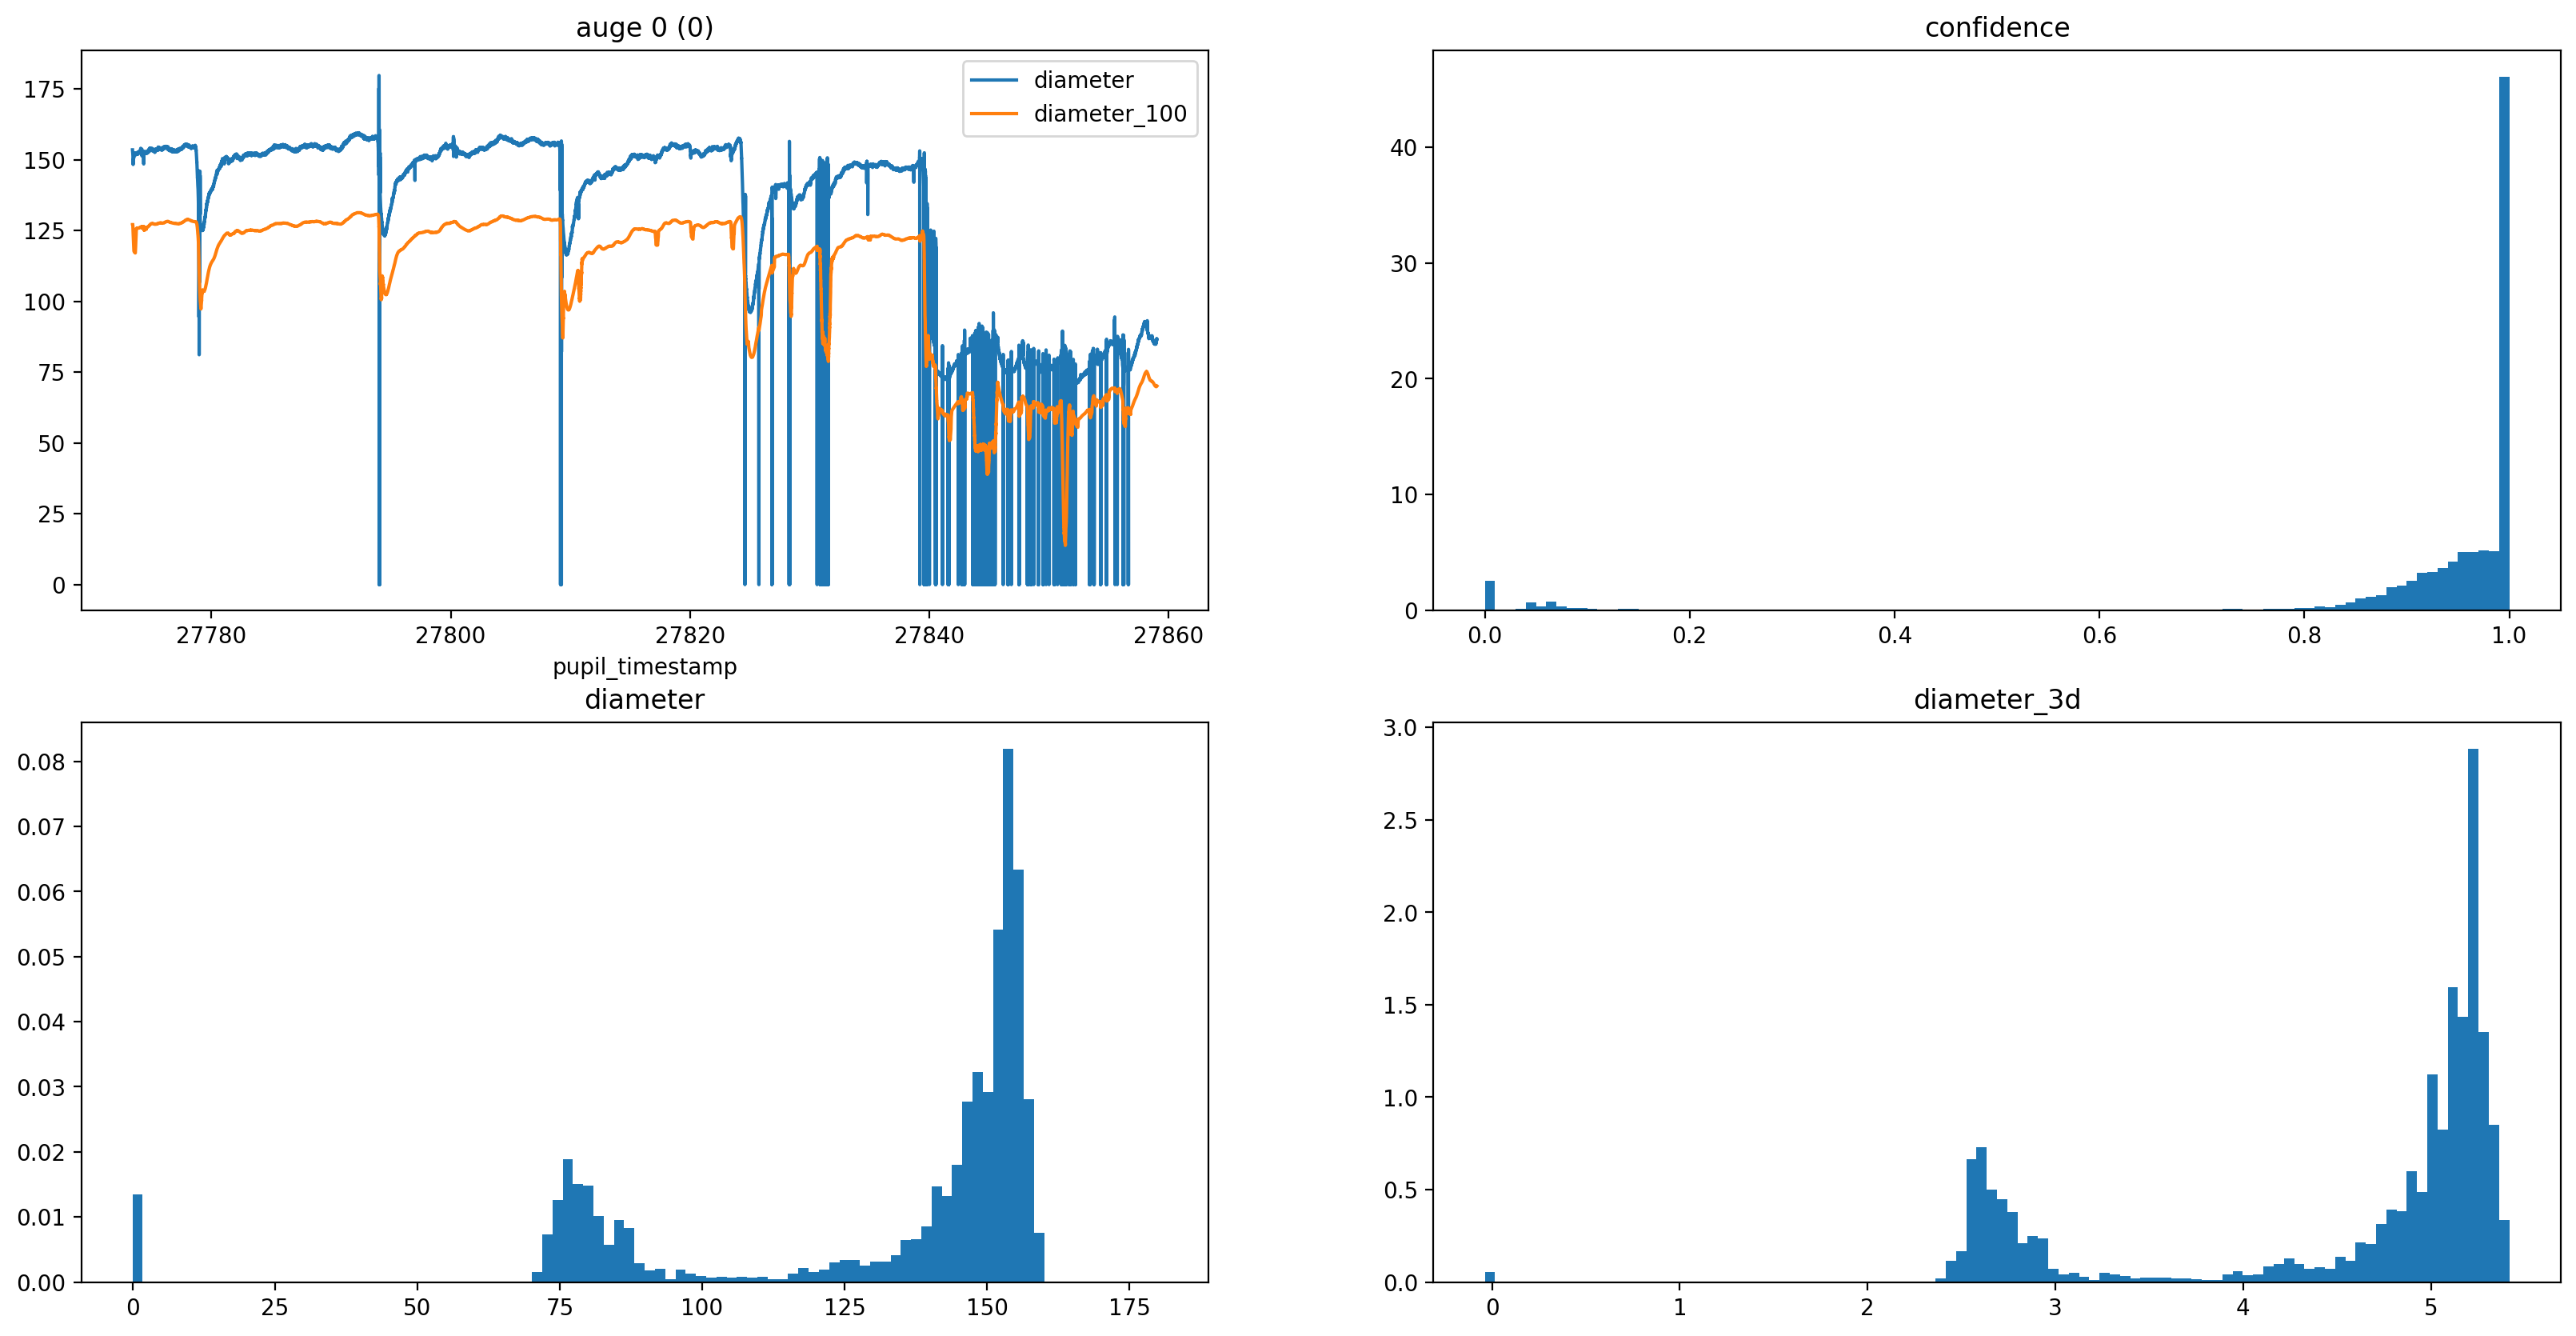

,pupil_timestamp,eye_id,confidence,diameter,diameter_3d,diameter_100,pupil_timestamp_based,rowid,timeslot
10750,27773.394969,0,0.965048,153.545731,NaN,127.126738,0.003254,0,0
10751,27773.394969,0,0.965048,153.522871,5.186446,127.117531,0.003254,1,0
10754,27773.403036,0,0.950132,153.344421,NaN,127.108182,0.011321,2,0
10755,27773.403036,0,0.950132,153.325403,5.179502,127.101383,0.011321,3,0
10758,27773.410923,0,1.000000,152.720485,5.159230,127.088824,0.019208,4,0
...,...,...,...,...,...,...,...,...,...
51815,27858.998821,0,1.000000,86.531479,NaN,70.054411,85.607106,20533,20
51818,27859.006871,0,1.000000,86.725915,2.932043,70.086564,85.615156,20534,20
51819,27859.006871,0,1.000000,86.726234,NaN,70.102132,85.615156,20535,20
51822,27859.014928,0,0.924724,86.810715,NaN,70.127477,85.623213,20536,20


In [4]:
# wenn ich checkpadata.py ändere, muß das Modul neu importiert werden. Das macht reload()
importlib.reload(checkdata)
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['figure.dpi'] = 200 
subject_id="PJ15_1_PLR1"
data_dir="/Users/Katharina/Desktop/Beispieldaten"
#data_dir="../data/groesse/3.4Stimulation/"
config=checkdata.DataConfig(window_duration=90)
eye0=checkdata.prepare(data_dir,subject_id,0,config)
eye1=checkdata.prepare(data_dir,subject_id,1,config)
checkdata.plot(eye0[0],"auge 0 (0)")
display(eye0[0])


### Use datamatrix from pydatamatrix.eu to fill in blinking gaps

In [5]:
!pip install fastnumbers
!pip install datamatrix
import datamatrix
import datamatrix.series
import datamatrix.operations

You should consider upgrading via the '/Users/Katharina/Desktop/Pupille/venv/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/Katharina/Desktop/Pupille/venv/bin/python3 -m pip install --upgrade pip' command.


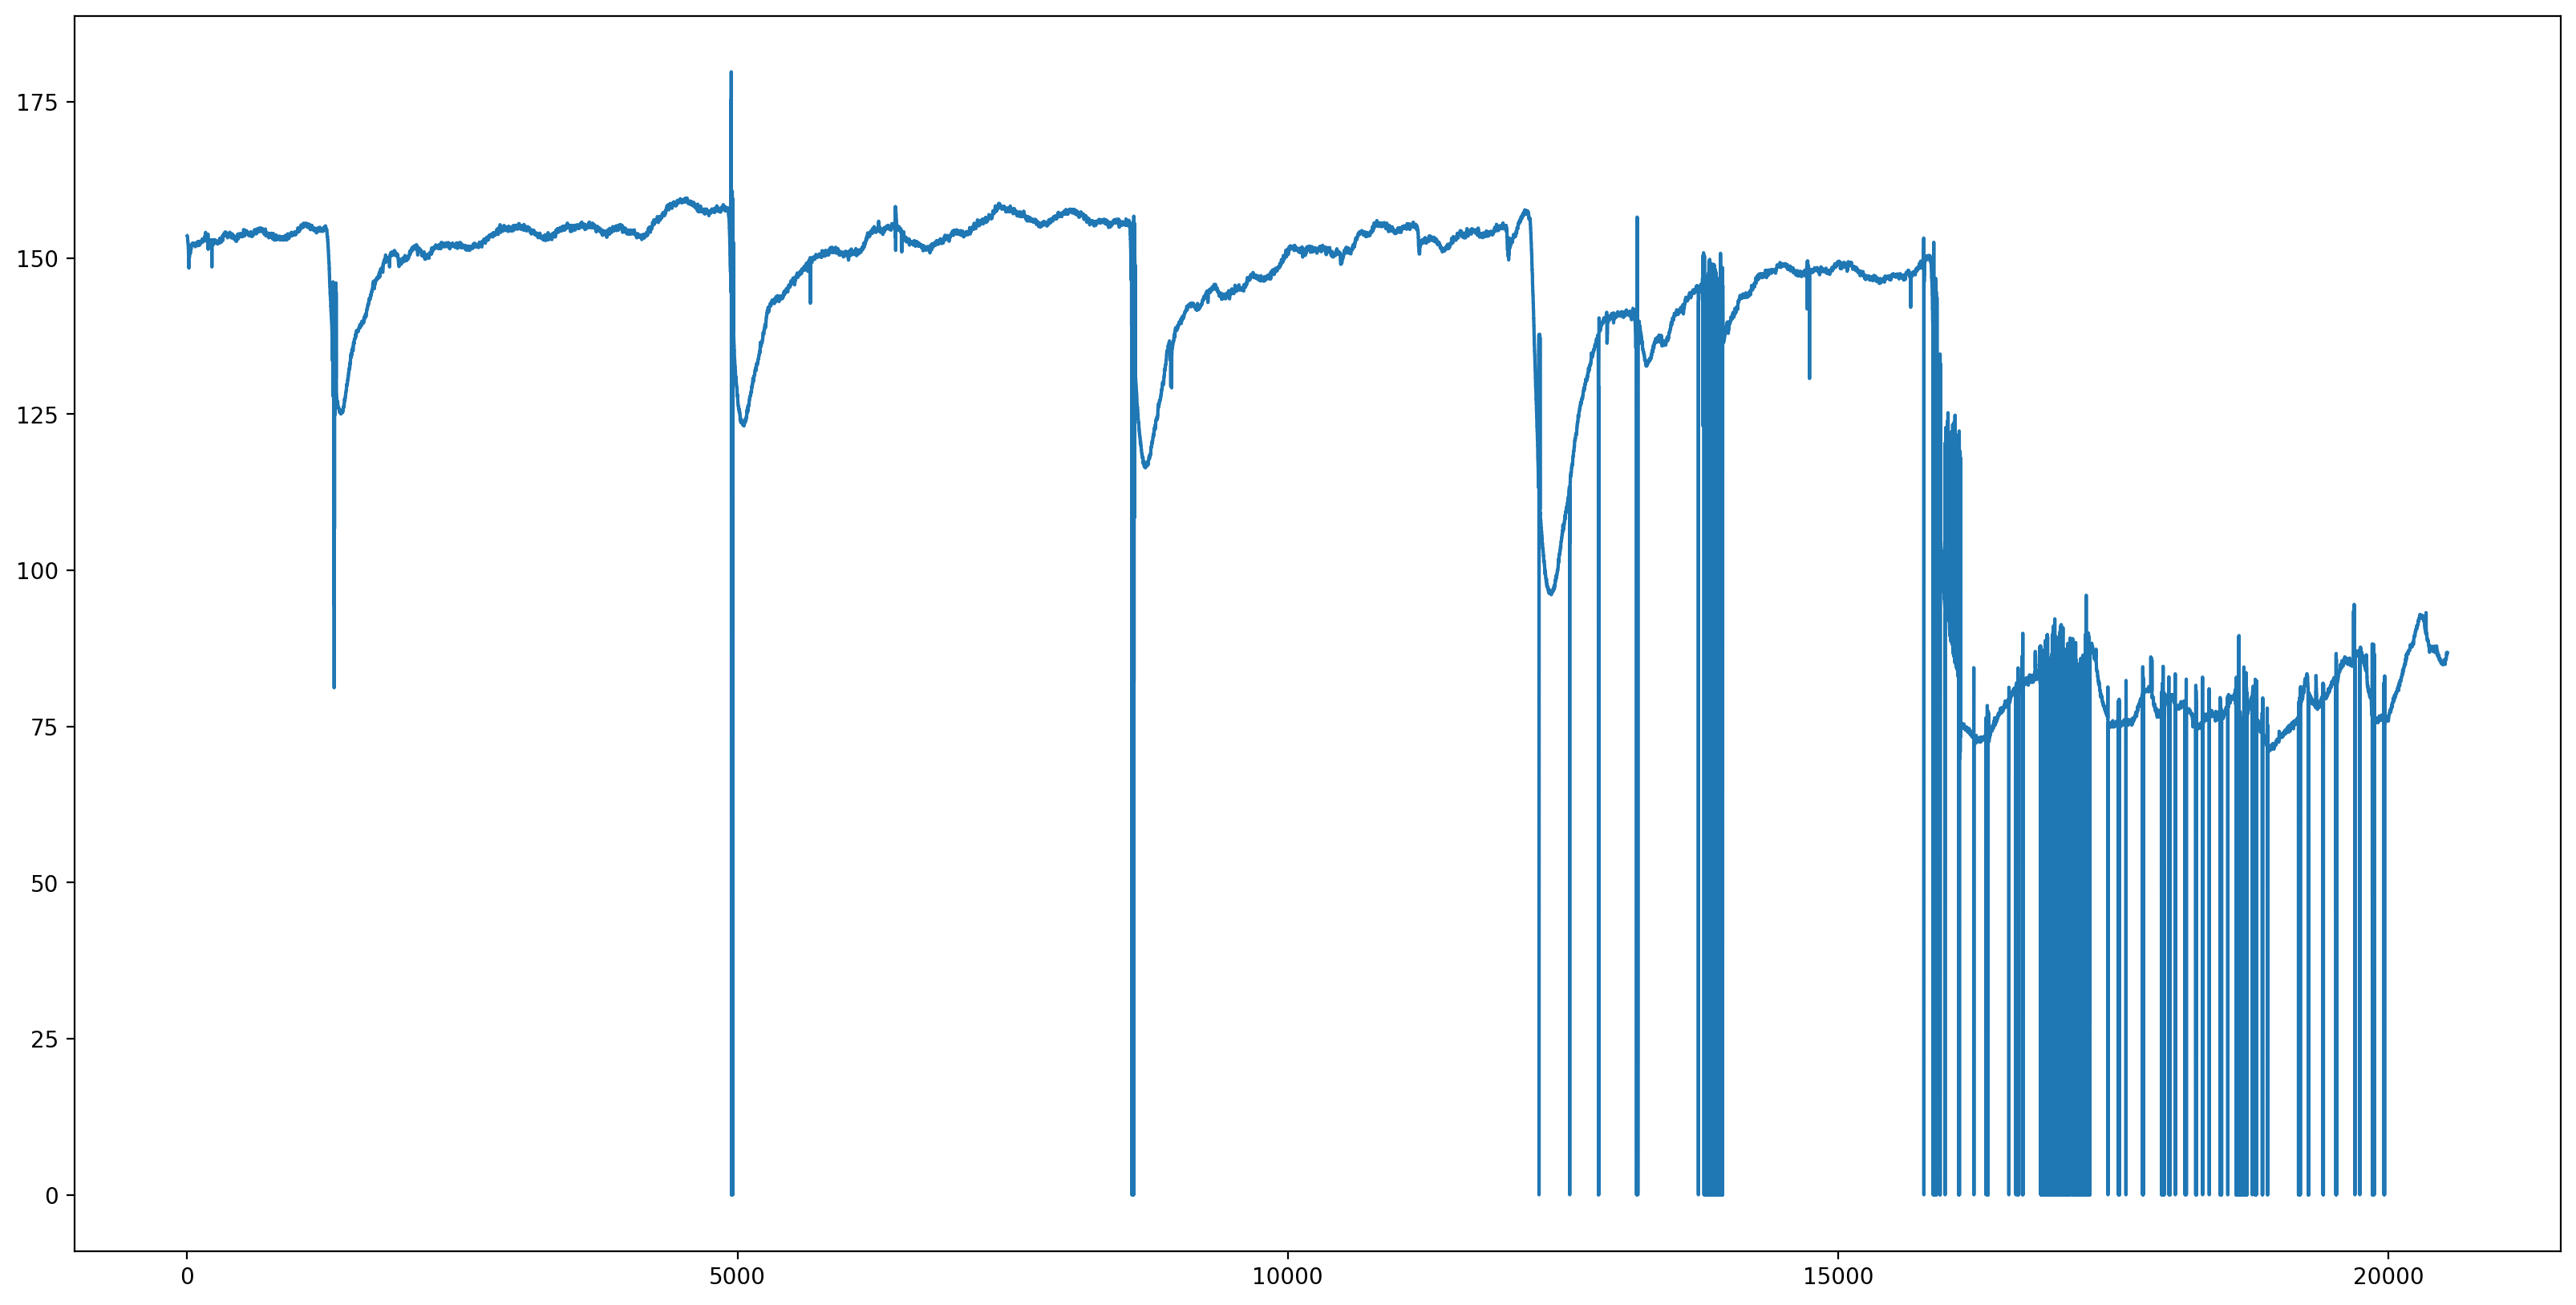

In [6]:
dm_eye0_diameter=datamatrix.convert.from_pandas(eye0[0])['diameter']
plt.plot(dm_eye0_diameter)


NameError: name 'eye' is not defined

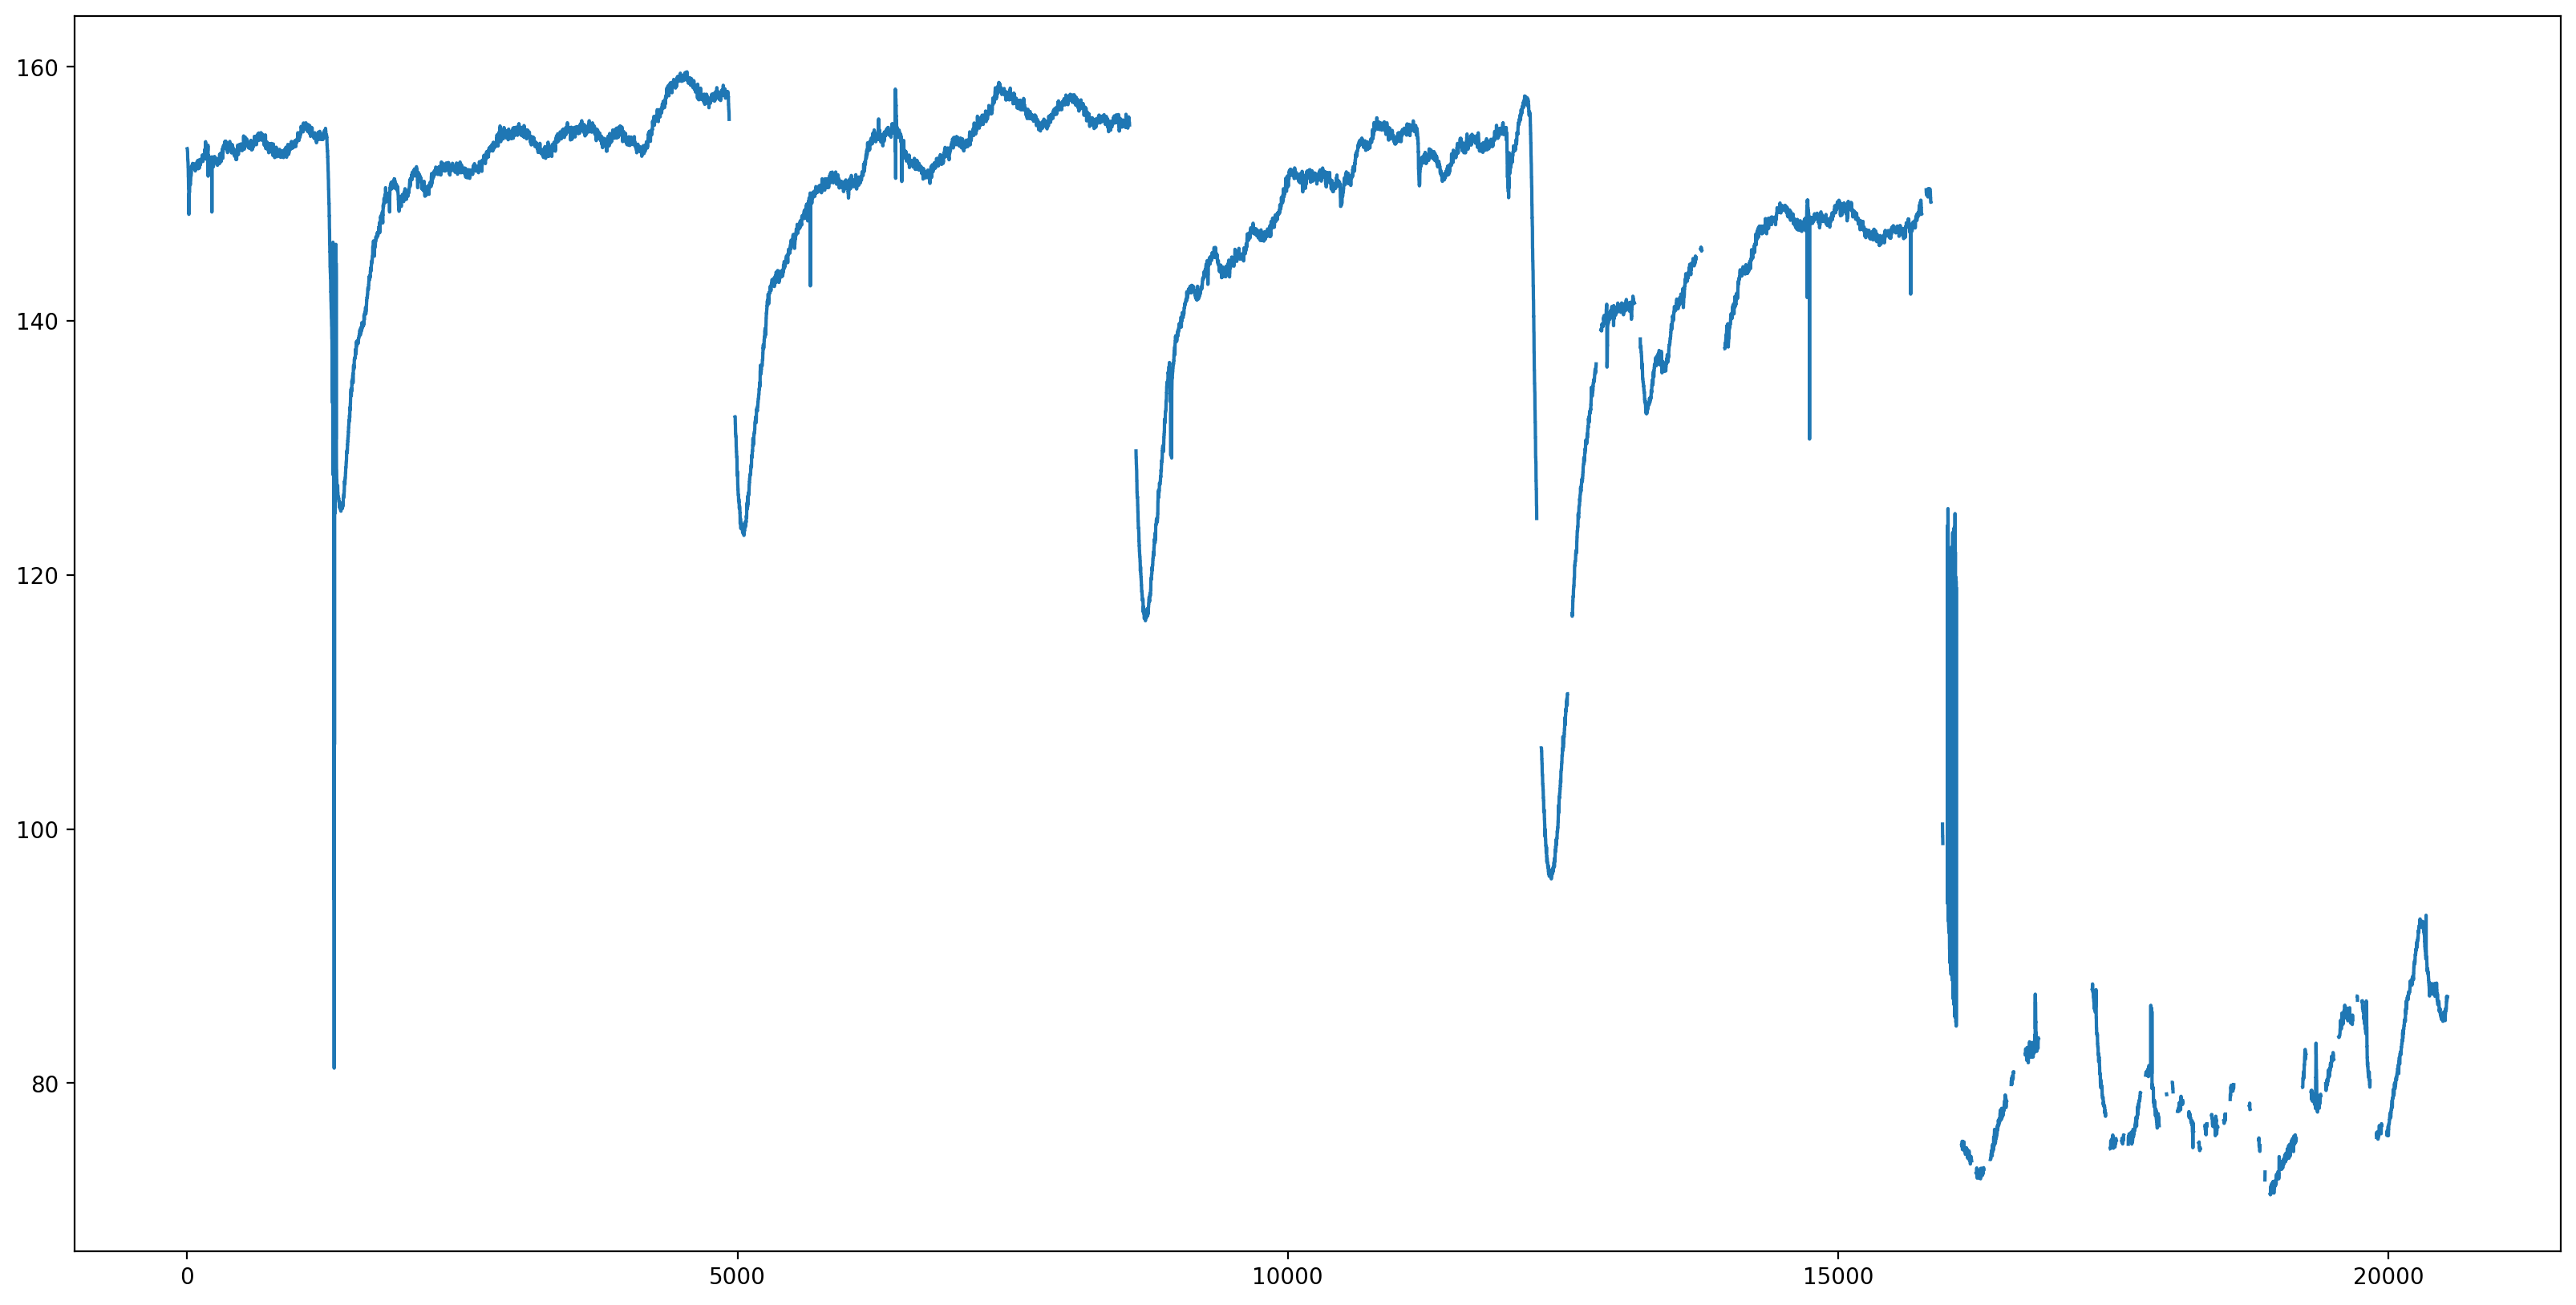

In [9]:
dm_eye0_diameter_fixed=datamatrix.series.blinkreconstruct(dm_eye0_diameter, mode='advanced')
plt.plot(dm_eye0_diameter_fixed)
eye['diameter_rec']=checkdata.blinkreconstruct(eye['diameter'],vt_start=10/800,vt_end=5/800, mode='advanced')


In [19]:
import preprocessing

In [10]:
import tkinter